# <center> Breast Cancer Diagnostic Clustering </center>
## <center> Prediction whether the cancer is benign or malignant </center>

![Healthcare](https://miro.medium.com/max/1200/0*iVLlELuYanEoxBlG.jpg)

## <div align="right"> Group: Level 6-7 - Medical-Healthcare <br> <br> </div>
### <div align="right"> Members: <br> </div>
**<div align="right"> Asad Mahmood <br> Ihor Markevych </div>**

# Table of Contents
1.  [**Originality**](#Or)
1.  [**Objective of the Proposed Research**](#obj)
2.  [**Data Exploration**](#de)
    + [See the head of dataframe](#as1)
    + [Dimensions of dataframe](#as2)
    + [Number of missing values in each column](#as3)
    + [Generating Statistical Analysis of the dataframe](#as4)
    + [Finding unique values in dataframe](#as5)
    + [Groups in data](#as6)
3.  [**Data Cleaning**](#dc)
4.  [**Adaptation**](#adapt)
5.  [**Descriptive Static Visualization**](#vis)
    + [Choosing the Value of K (For K Means)](#p1)
    + [t-SNE](#p2)
    + [Prediction Mesh](#p3)
    + [Centroids](#p4)
    + [Pie Chart](#p5)
6.  [**Innovative Visualization**](#ivis)
    + [3D Plot](#in1)
    + [Probability of Belonging to Cluster](#in2)
7.  [**Explore Correlations**](#cor)
8.  [**Step-by-step hierarchical clustering**](#ssh)
9.  [**Dendrogram**](#Dendo)
10. [**Step-by-step K-means**](#sskm)
11. [**sklearn.cluster: K-Means**](#km)
12. [**kNN Function**](#knn_fun)
    * [Prediction using kNN](#knn_predict)
13. [**sklearn.cluster: kNN**](#knn)
14. [**Project Report**](#report)

<a id='Or'></a>
# Originality

**"Similar published works of clustering found with same dataset"**

There are quite a few published works related to this dataset but our work is different from these works. The diffeneces are as follows:

1. We have implemented K-Means, kNN and hierarhical clustering functions by hand and they are our own original work. Whereas, in published sklearn library have been used extensively.

2. We have implemented only K-Means, kNN and hierarchical clustering for our analysis. Whereas, in published works random forest and svm is the most commonly implemented clustering algorithim. The other implementations are logistic regression and ANN implementations.

3. We haven't done PCA on our project and all the published works have done PCA for dimentionality reduction. nstead, tSNE was performed, since it allows to save density of close points, while PCA saves variance of data.

These are the three main key diffrences between our work and published works.

<a id='obj'></a>
## Objective of the Proposed Research

### Stakeholder:
Breast Cancer Clinics.

#### Impact on stakeholder:
Clustering pacients into benign or malignant groups will allow preprocessing of digitized image of a fine needle aspirate (FNA) of a breast mass before setting diagnosis. This can help doctors to make correct diagnosis and react sooner for patients with potentially malignant illness, which may save lives.

### Research Objective:
Following [dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) contains features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and diagnosis. Features describe characteristics of the cell nuclei present in the image and can be used as a data for clustering.  
  
Research will be focused on investigating data for quantity of potential clusters (it may be more than two, even despite only two types of diagnosis are present in a dataset, since there can be subtypes of diagnosis). After this, natural continuation of research will be to find clusters.  
  
Firstly, unsupervised learning clusterisation will be used to find clusters based on features. Next, clusters will be checked on which diagnosis they have. Those clusters can be used to investigate whether data can be effectivly clustered with unsupervised learning.  
  
Next, supervised learning algorythm will be used to create clustering that can predict whether patient has benign or malignant breast cancer.  
  
For all types of clustering custom functions will be created.  

### Reading CSV File and Loading Libraries

**1. NumPy:**   
NumPy stands for Numerical Python. This library contains basic linear algebra functions, fourier transforms, advanced random number capabilities.
  
  
**2. Pandas:**   
This library is for structured data operations and manipulations. It is extensively used for data managing and preparation.
  
  
**3. Matplotlib:**  
Python based plotting library offers matplotlib.
  
**4. Seaborn:** <br/>
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
#Call libraries.
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

import itertools

from sklearn import metrics
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import plotly

# Set some pandas options
pd.set_option('display.max_rows', 10)
pd.options.display.float_format = '{:.2f}'.format

# Preparation for matplotlib
%matplotlib inline 

In [2]:
d = pd.read_csv("data.csv")

<a id='de'></a>
## Data Exploration
### Exploration of data with tables and plots

**TARGET:**<br/>
Describe your data with code (and text) depicting at least 4 different aspects of your it.

<a id='as1'></a>
#### Aspect 1: See the head of dataframe

In [3]:
d.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,nan
5,843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,...,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,nan
6,844359,M,18.25,19.98,119.60,1040.00,0.09,0.11,0.11,0.07,...,27.66,153.20,1606.00,0.14,0.26,0.38,0.19,0.31,0.08,nan
7,84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,...,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,nan
8,844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,...,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,nan
9,84501001,M,12.46,24.04,83.97,475.90,0.12,0.24,0.23,0.09,...,40.68,97.65,711.40,0.19,1.06,1.10,0.22,0.44,0.21,nan


<a id='as2'></a>
#### Aspect 2: Dimensions of dataframe

The function `shape()` will be used to get the number of rows and columns.

In [4]:
#Get dimensions of the data frame using shape function.
dimensions = d.shape
print ("Now we see that the dimensions of the dataframe are,", dimensions[0], "rows and ", dimensions[1], "columns.")

Now we see that the dimensions of the dataframe are, 569 rows and  33 columns.


<a id='as3'></a>
#### Aspect 3: Number of missing values in each column

The `info()` function will allow seeing the missing values in the dataframe.

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

There is  **one column with all missing values** in the dataframe. We'll clean it later, since it is reading glitch.

We see that all rows have 32 over 32 columns with no missing values in 569 rows of data, except for one column that appeared from data reading error.

<a id='as4'></a>
#### Aspect 4: Generating Statistical Analysis of the dataframe

Using the *describe()* function to get a statistical summary of the dataframe's **numeric** only columns.

In [6]:
d.describe(include=[np.number])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,nan
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,nan
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,nan
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,nan
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,nan
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,nan
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,nan


**Result:**<br/>
Next statistical values of the data were discovered:<br/>
+ Count of rows = 569
+ Mean of all the different measurments involved in determining the breast cancer.
+ Percentiles of all the different measurments involved in determining the breast cancer.
+ Standard deviation of all the different measurments involved in determining the breast cancer.

<a id='as5'></a>
#### Aspect 5: Finding unique values in dataframe 

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(d)

id | 569 | int64
diagnosis | 2 | object
radius_mean | 456 | float64
texture_mean | 479 | float64
perimeter_mean | 522 | float64
area_mean | 539 | float64
smoothness_mean | 474 | float64
compactness_mean | 537 | float64
concavity_mean | 537 | float64
concave points_mean | 542 | float64
symmetry_mean | 432 | float64
fractal_dimension_mean | 499 | float64
radius_se | 540 | float64
texture_se | 519 | float64
perimeter_se | 533 | float64
area_se | 528 | float64
smoothness_se | 547 | float64
compactness_se | 541 | float64
concavity_se | 533 | float64
concave points_se | 507 | float64
symmetry_se | 498 | float64
fractal_dimension_se | 545 | float64
radius_worst | 457 | float64
texture_worst | 511 | float64
perimeter_worst | 514 | float64
area_worst | 544 | float64
smoothness_worst | 411 | float64
compactness_worst | 529 | float64
concavity_worst | 539 | float64
concave points_worst | 492 | float64
symmetry_worst | 500 | float64
fractal_dimension_worst | 535 | float64
Unnamed: 32 | 1 | float64

Target column **diagnosis** has only 2 unique values. Other columns have different numeric values.

<a id='as6'></a>
#### Aspect 6: Groups in  data 

Let's check the dataframe distribution using the target column which is referred to as **diagnosis.** This will show how many cases of **malignant** and **benign** are present.

In [8]:
DiagnosisCount = d.groupby("diagnosis").size()
DiagnosisCount

diagnosis
B    357
M    212
dtype: int64

There are **357 instances of benign cases** and **212 instances of malignant**.  
Those quantities are quite close. This is good for research, because otherwise we would need to ensure that our clustering algorythms incorporate their difference.

<a id='dc'></a>
## Data Cleaning

**TARGET:**<br/>
Clean the data, removing rows and columns that have no useful information or no information at all.

In [9]:
d = d.drop(['id'], axis=1)

We have dropped **id** column from the dataframe as it does not provide any useful information regarding the task at hand i.e clustering. Apart from that we need to clean one more column of the data, which we found in the **Data Exploration**.

In [10]:
d = d.dropna(axis=1)

After this cleaning, we have complete dataframe without any missing values.

<a id='adapt'></a>
# Adaptation

**TARGET:**<br/>
Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

Let's drop target column and get features dataset.

In [11]:
features = d.drop(['diagnosis'], axis = 1)

Now, let's do data adaptation with scaling:

In [12]:
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

We have created 31 new columns from old one. Those columns are scaled columns that we will use instead of original data. Values in those columns are between 0 and 1, which will suite best for clustering, since it is based on distance metric.

<a id='vis'></a>
# Descriptive Static Visualization

**TARGET:**<br/>
 Create a few (at least 4) distinct relevant static visualizations that show different clusters of the data. Two visualizations of the same kind (e.g. two scatter plots) are not considered distinct. You can use any of the libraries or examples covered in class, or you can research your own examples.



<a id='p1'></a>
## Plot 1: Choosing the Value of K (For K Means)

Since we want to make our clustering classification as accurate, as possible, we'll try to find optimal solustion using elbow method.

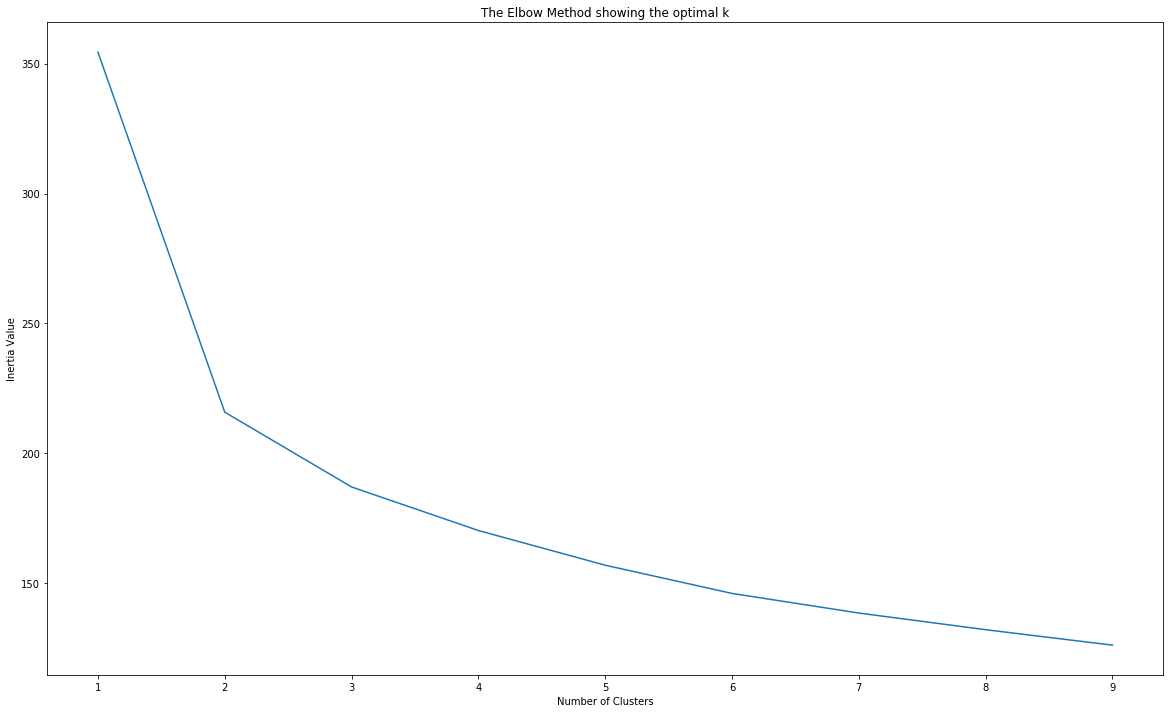

In [13]:
#Initialize a list of clusters from 1 to 10 clusters 
clusters = range(1,10)

#Create an empty list in order to store the inertia values 
inertia_values = []

# Build KMeans model and fit the data accordingly
for cluster in clusters:
    k_means_for_elbow = KMeans(n_clusters = cluster)
    k_means_for_elbow.fit(features)
    inertia_values.append(k_means_for_elbow.inertia_)

# Plot the result

plt.figure(figsize = (20,12))
plt.plot(clusters, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('The Elbow Method showing the optimal k')
plt.show()

This chart shows the elbow point at 2 clusters which means that $k = 2$ clusters are our optimum number of clusters for K-Means algorythm.

<a id='p2'></a>
## Plot 2: t-SNE

Let's plot t-distributed stochastic neighbor embedding chart to visualize our clusters from K-Means algorythm:

In [14]:
#Creating K-means with 2 clusters as shown by the elbow method

k_means = KMeans(n_clusters = 2)
k_means.fit(features)

#Setting target labels from corDF
target = k_means.predict(features)
target = pd.Series(target)

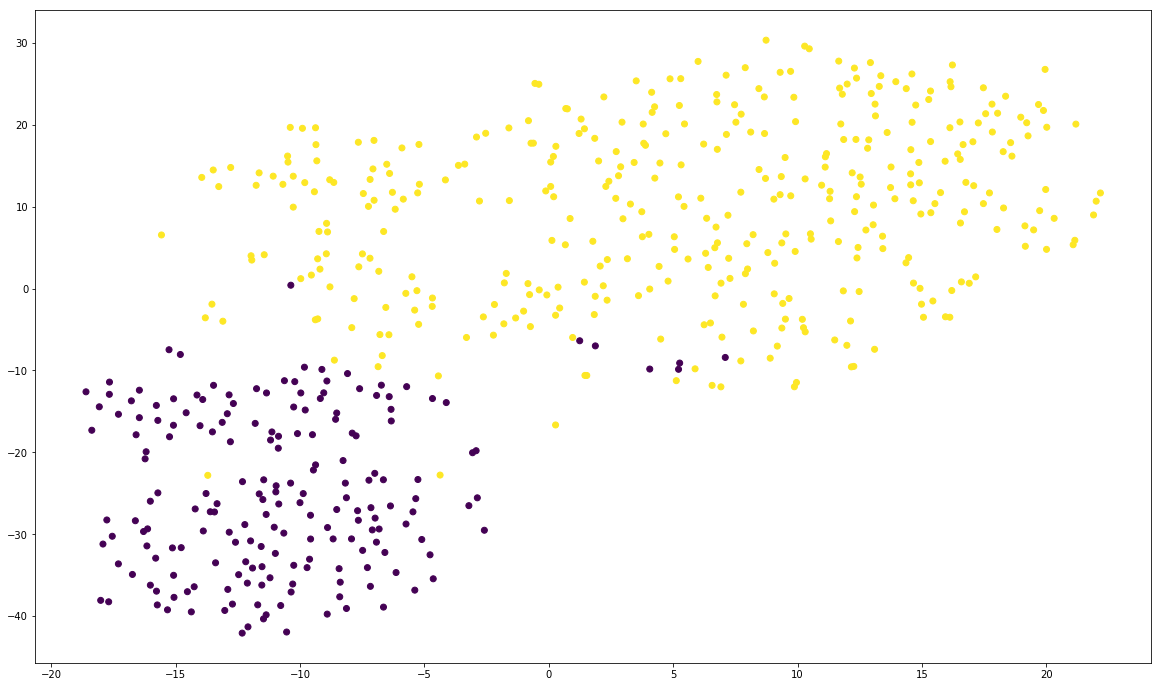

In [15]:
tsne = TSNE()
transformed = tsne.fit_transform(features) 

#Creating a t-SNE visualization

x_axis = transformed[:,0]
y_axis = transformed[:,1]

plt.figure(figsize = (20,12))
plt.scatter(x_axis, y_axis, c = target)
plt.show()

This chart maps a higher dimension to a two-dimensional space and so, we are able to visualize our dataset and clusters, that we have got with K-Mean algorythm.

For comparison, let's also plot t-SNE, but now use original labels instead of predicted.

In [16]:
labels = d['diagnosis']

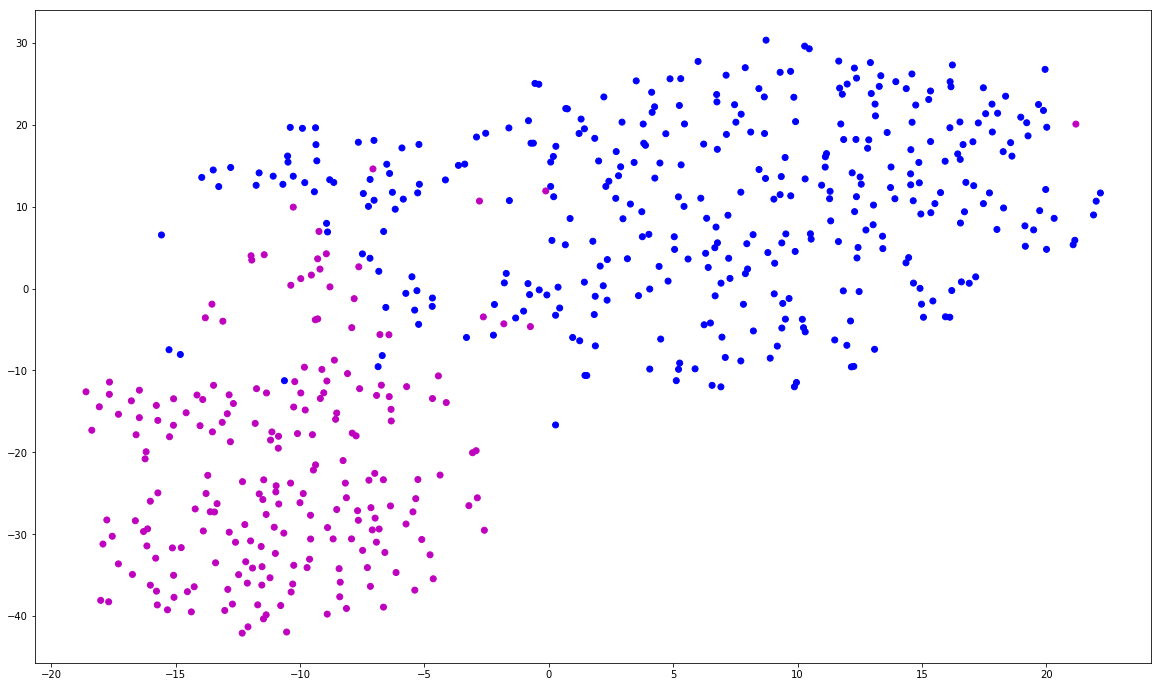

In [17]:
plt.figure(figsize = (20,12))
plt.scatter(x_axis, y_axis, c = labels)
plt.show()

As we can see, our K-Means algorythm can differentiate clusters quite good.

<a id='p3'></a>
## Plot 3: Prediction Mesh

Let's plot a prediction mesh that will be based in K-Means model with 2 clusters, trained on `'radius_mean'` and `'texture_mean'`.

C:\Users\Dergel\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



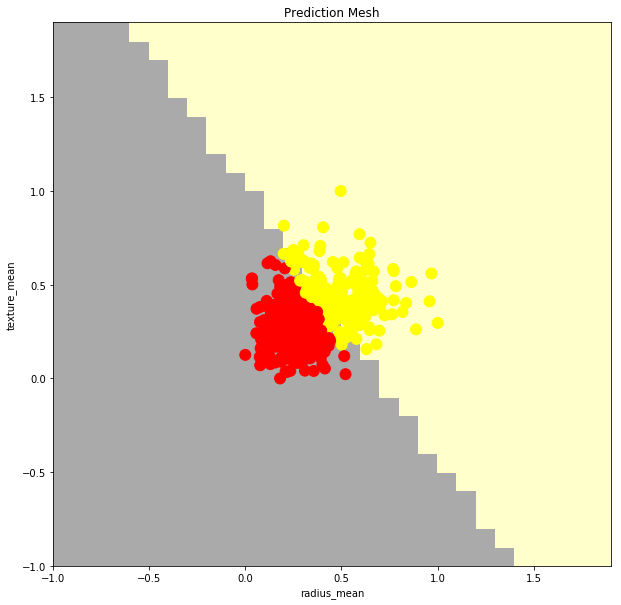

In [18]:
def plotMesh(d, col1, col2, k):
    
    model = KMeans(n_clusters = k)
    model.fit(np.c_[d[col1], d[col2]])
    
    h = 0.1
    
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = d[col1].min() - 1, d[col1].max() + 1
    y_min, y_max = d[col2].min() - 1, d[col2].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10, 10))
    plt.pcolor(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(d[col1], d[col2], c = colormap[model.labels_], s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("Prediction Mesh")
    ax = fig.add_subplot(111)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    
plotMesh(features, 'radius_mean', 'texture_mean', 2)

This can give us some understanding about separation of clusters on plane space.  
We can assume that SVM may work quite accurate.

<a id='p4'></a>
## Plot 4: Centroids

Let;s now visualize how algorythm works (since we want to explain the idea of algorythm to our stakeholder, because they won't accept something "magical"). To do this, we'll plot clusters and centroids for `'radius_mean'` and `'texture_mean'` variables.

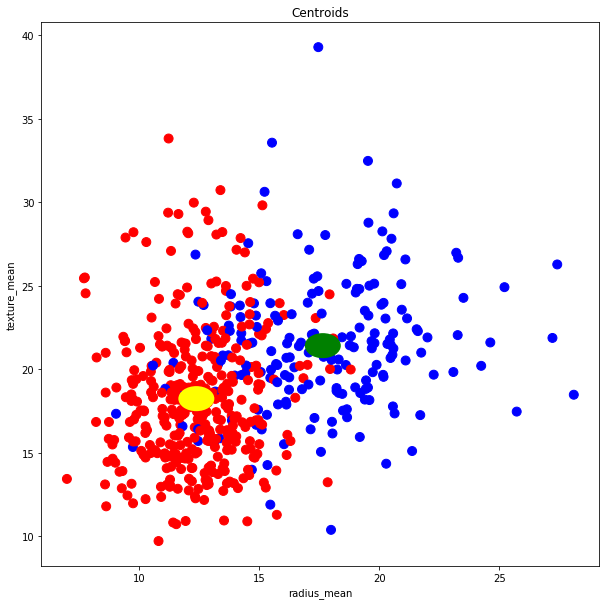

In [19]:
centroid1 = d[target == 0][['radius_mean', 'texture_mean']].mean()
centroid2 = d[target == 1][['radius_mean', 'texture_mean']].mean()

fig = plt.figure(figsize=(10, 10))
 
# Create a colormap
colormap = np.array(['blue', 'red'])
 
# Plot Sepal
plt.scatter(d['radius_mean'], d['texture_mean'], c=colormap[target], s = 80)
plt.title('Centroids')
ax = fig.add_subplot(111)
ax.set_xlabel('radius_mean')
ax.set_ylabel('texture_mean')
circle1 = plt.Circle(centroid1, radius=0.75, fc='green')
circle2 = plt.Circle(centroid2, radius=0.75, fc='yellow')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

<a id='p5'></a>
## Plot 5: Pie Chart

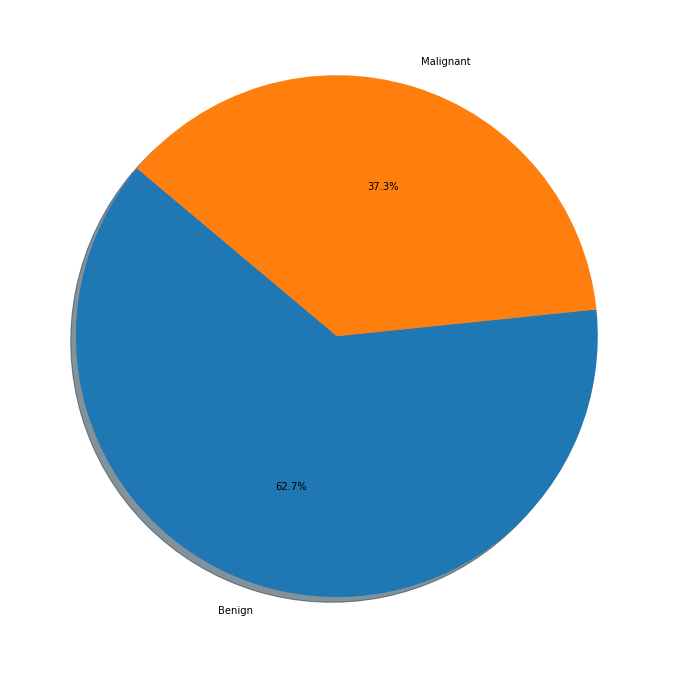

In [20]:
plt.figure(figsize = (20,12))
plt.pie(d.groupby("diagnosis").size(), labels=['Benign', 'Malignant'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

This pie chart depicts the data instances proportion that are classified as **"Benign"** and **"Malignanat"**

<a id='ivis'></a>
# Innovative Visualization

<a id='in1'></a>
### Plot 1: 3D Plot

To give even better understanding of our clusters, let's plot them with 3D interactive plot, where clusters will be based on available from data lables and data will be t-SNE transformed to three dimensional space.

In [21]:
# Visualize cluster shapes in 3d.
tsne = TSNE(n_components=3)

dFor3D = tsne.fit_transform(features)

cluster1 = dFor3D[target == 0]
cluster2 = dFor3D[target == 1]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1[:,0], y = cluster1[:,1], z = cluster1[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2[:,0], y = cluster2[:,1], z = cluster2[:,2],
    marker = dict( size=2, color='blue')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1[:,0], y = cluster1[:,1], z = cluster1[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2[:,0], y = cluster2[:,1], z = cluster2[:,2],
    color='blue', showscale = True
)
layout = dict(
    title = '3D Clusters Visualization',
    scene = dict(
        xaxis_title='radius_mean',
        yaxis_title='texture_mean',
        zaxis_title='smoothness_mean',
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
# fig = dict( data=[scatter1, scatter2, cluster1, cluster2], layout=layout )
# plotly.offline.iplot(fig, )


def rotate_z(x, y, z, theta):
    w = x + 1j * y
    return np.real(np.exp(2 * np.pi * 1j * theta) * w), np.imag(np.exp(2 * np.pi * 1j * theta) * w), z


axes_style = dict(showbackground = False, showticklabels=False, title='')

#initial position of the camera eye
x_eye, y_eye, z_eye = 1.25, 1.25, 0.8                             
layout = dict(title = 'Camera eye rotation',
            width = 800,
            height = 800, 
            autosize = False,
            scene = dict(camera = dict(eye = dict(x = x_eye, y = y_eye, z = z_eye)),
                       xaxis = axes_style,
                       yaxis = axes_style,
                       zaxis = axes_style,))

fw = plotly.graph_objs.FigureWidget(data = [scatter1, scatter2, cluster1, cluster2], layout = layout)


import ipywidgets as iw
slider = iw.IntSlider(value = 0, min = 0, max = 180, step = 2, description = 'rotation angle')
slider.layout = dict(margin = '10px 80px 40px 5px', width = '500px') #margin describes top, right, bottom, left

def angle_changed(change):
    theta = np.pi * slider.value / 180
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -theta)
    fw.layout.scene.camera.eye = dict(x = xe, y = ye, z = ze)

slider.observe(angle_changed, 'value')

play_widget = iw.Play(value = 0, min = 0, max = 180, step = 1) #the play_widget values are linked with IntSlider value
play_widget.layout = dict(margin = '10px 10px 50px 100px')
iw.link((play_widget, 'value'), (slider, 'value'))
iw.VBox([fw, iw.HBox([play_widget, slider])])

# inspired by https://plot.ly/~empet/14913.embed

    'data': [{'marker': {'color': 'green', 'size': 2},
              'mode': 'ma…

It can be seen that data should be quite easily clustered into two clusters, even despite there are some points that are close to both clusters.

<a id='in2'></a>
### Plot 2: Probability Of Point Belonging To Cluster

In [22]:
def plotProbabilityOfPointBelongingToCluster(data, cluster_centers, nh=100, meshColor='plasma'):
    #     plots colored mesh grid for each point after applying tSNE 
    #     based on cluster centers (from K-Means) and euclidian distance
    
    #     define to which cluster point belongs based on euclidian distance to cluster_centers
    def sureness(point, cluster_centers):
        distances = np.array([np.linalg.norm(centroid - point) ** 2 for centroid in cluster_centers])
        sureness = 1 - np.min(distances) / (sum(distances) - np.min(distances))
        return sureness
    
    #     transform all data together with cluster centers with tSNE
    tsne = TSNE()
    transformed = tsne.fit_transform(data.append(pd.DataFrame(model.cluster_centers_, columns=data.columns)))
    #     separate cluster from other data (copy, to be precise)
    clusterCenters = transformed[-len(cluster_centers):,:]
    
    #     get max and min values of both axis for mesh grid
    x_min, x_max = transformed[:,0].min() - 1, transformed[:,0].max() + 1
    y_min, y_max = transformed[:,1].min() - 1, transformed[:,1].max() + 1
    
    #     mesh step
    h = min((x_max - x_min) / nh, (y_max - y_min) / nh)
    
    #     create mesh grip (grid of points) to color rectangular that are defined by points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #     find to which cluster each point belongs
    surenessForEachMeshPoint = np.array([sureness([x,y], clusterCenters) for x,y in np.c_[xx.ravel(), yy.ravel()]])

    #     reshape it to fit plt.pcolor
    surenessForEachMeshPoint = surenessForEachMeshPoint.reshape(xx.shape)

    
    #     plot colors       
    plt.figure(figsize=(20,10))
    plt.pcolor(xx, yy, surenessForEachMeshPoint, cmap=meshColor)
    
    #     and also points with cluster centers
#     plt.scatter(transformed[:,0], transformed[:,1])
#     plt.scatter(clusterCenters[:,0], clusterCenters[:,1], c='red')



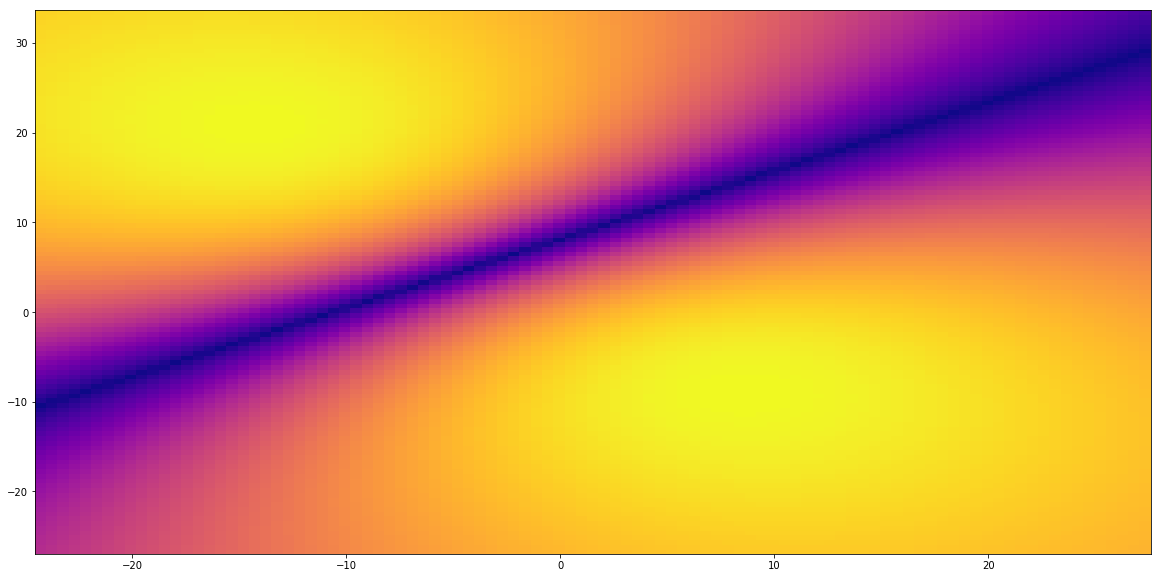

In [23]:
model = KMeans(n_clusters=2)
model.fit(features)

plotProbabilityOfPointBelongingToCluster(features, model.cluster_centers_)

The chart above represents probability that certaing point on a space belongs to specific cluster.  
The lighter is the color, the highest is probability that point belongs to certain cluster.  
For representing multidimensional data, t-SNE is applied.  
  
For defining probability, next metric is used:  

$$1 - \frac{min(d)}{\sum_{i \neq argmin(d)} d_i},$$  

where $d_i$ is square of euclidian distance between point in space and center of cluster $i$.


<a id='cor'></a>
# Explore Correlations

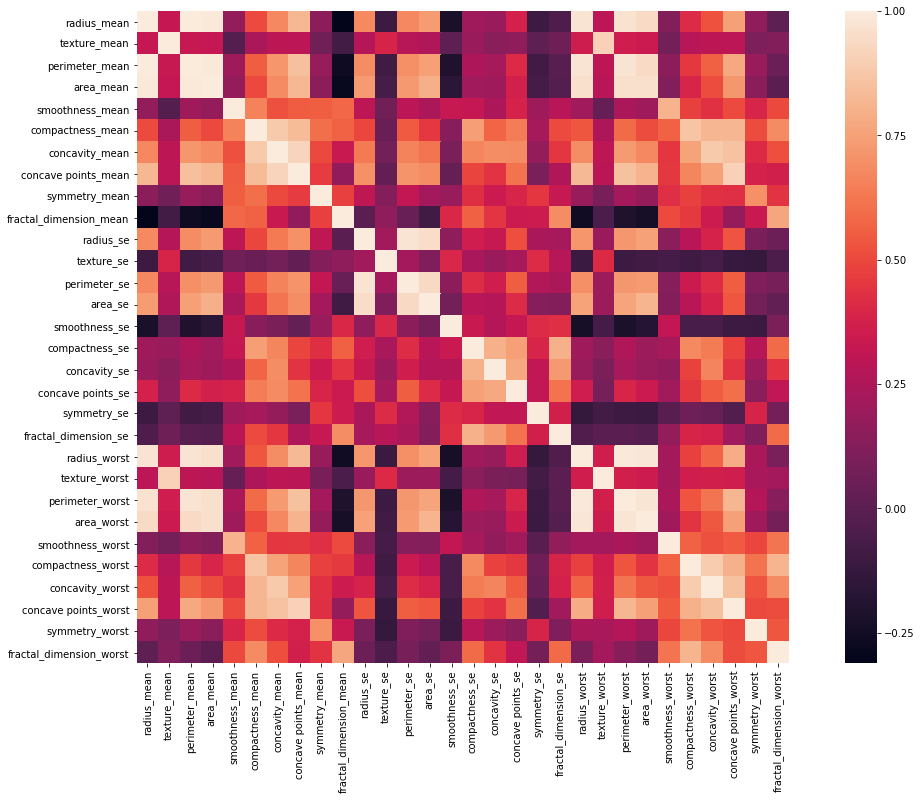

In [24]:
cor = features.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, square = True)
plt.show()

This plot illustrates the correlations of our feature columns with one another. There are a lot of columns that are negatively corelated with each other. The range of corelation lies between -0.3 to 1.00.

<a id='ssh'></a>
# Step-by-step hierarchical clustering

Next cell is additional function for getting flat array of cluster labels for output of a function `hierarchClustering`.

In [25]:
def labelClusters(d, clusters):
    
    labels = []
    
    def belongsToCluster(row, clusters):
        i = 0
        for cluster in clusters:
            for point in cluster:
                if (row == point).all():
                    return i
            i += 1
    
    for _, row in d.iterrows():
        labels = labels + [belongsToCluster(row, clusters)]

    return labels

# labels = [np.where([np.any([(row == c).all() for c in cluster]) for cluster in hierarchClusters])[0][0] 
#           for _, row in features.iterrows()]

# alternative way of labeling

Next function implements agglomeration clustering, which is represented by next algorythm:
1. Set each point as separate cluster.
1. Repeat until get `k` clusters:
 1. Find two closest clusters.
 1. Merge them into one cluster.

In [26]:
def hierarchClustering(d, k, distanceType='min'):
    
    def distance(a, b, distanceType='min'):
        distances = []
        for x in a:
            for y in b:
                distances += [np.linalg.norm(x - y)]
                
        if distanceType == 'mean':
            return np.mean(distances)
        elif distanceType == 'max':
            return max(distances)
        elif distanceType =='min':
            return min(distances)

        
        
    clusters = [[np.array(row)] for _, row in d.iterrows()]

    distances = np.full((len(clusters), len(clusters)), float('nan'))
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distances[i, j] = distance(clusters[i], clusters[j])
    
    while len(clusters) > k:
        # find two closest clusters
        toBeMerged = np.argwhere(distances == np.nanmin(distances))[0]

        # merge clusters
        clusters[toBeMerged[0]] = [c for c in clusters[toBeMerged[0]]] + [c for c in clusters[toBeMerged[1]]]
        del clusters[toBeMerged[1]]

        # remove extra row and column from distances matrix
        distances = np.delete(distances, toBeMerged[1], axis=0)
        distances = np.delete(distances, toBeMerged[1], axis=1)

        # update distances matrix (only needed rows and columns)
        for i in range(toBeMerged[0]):
            distances[i, toBeMerged[0]] = distance(clusters[i], clusters[toBeMerged[0]])

        for i in range(toBeMerged[0] + 1, len(distances)):
            distances[toBeMerged[0], i] = distance(clusters[toBeMerged[0]], clusters[i])
        
    return clusters

In [27]:
hierarchClusters = hierarchClustering(features, 2)

In [28]:
hierarchClusters[0][:5]

[array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396]),
 array([0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
        0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
        0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
        0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813]),
 array([0.56599934, 0.39228948, 0.55151683, 0.41845175, 0.33817821,
        0.2561806 , 0.25304592, 0.39517893, 0.26363636, 0.09793597,
        0.24526525, 0.09664516, 0.22282429, 

Example of usage of `labelClusters` fuction:

In [29]:
labelClusters(features, hierarchClusters)[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<a id='Dendo'></a>
# Dendrogram

Dendrogram is visualized here. It is a type of hierachal clustering, which uses bottom up approach. In this approach all the rows in the dataframe are initially treated as individual clusters and then they are kept on being merged together as we progress until all the instances are merged into one cluster. This dendrogram starts with **569** clusters in the beginning that's why its difficult to see indivisual clusters at the beginning.    

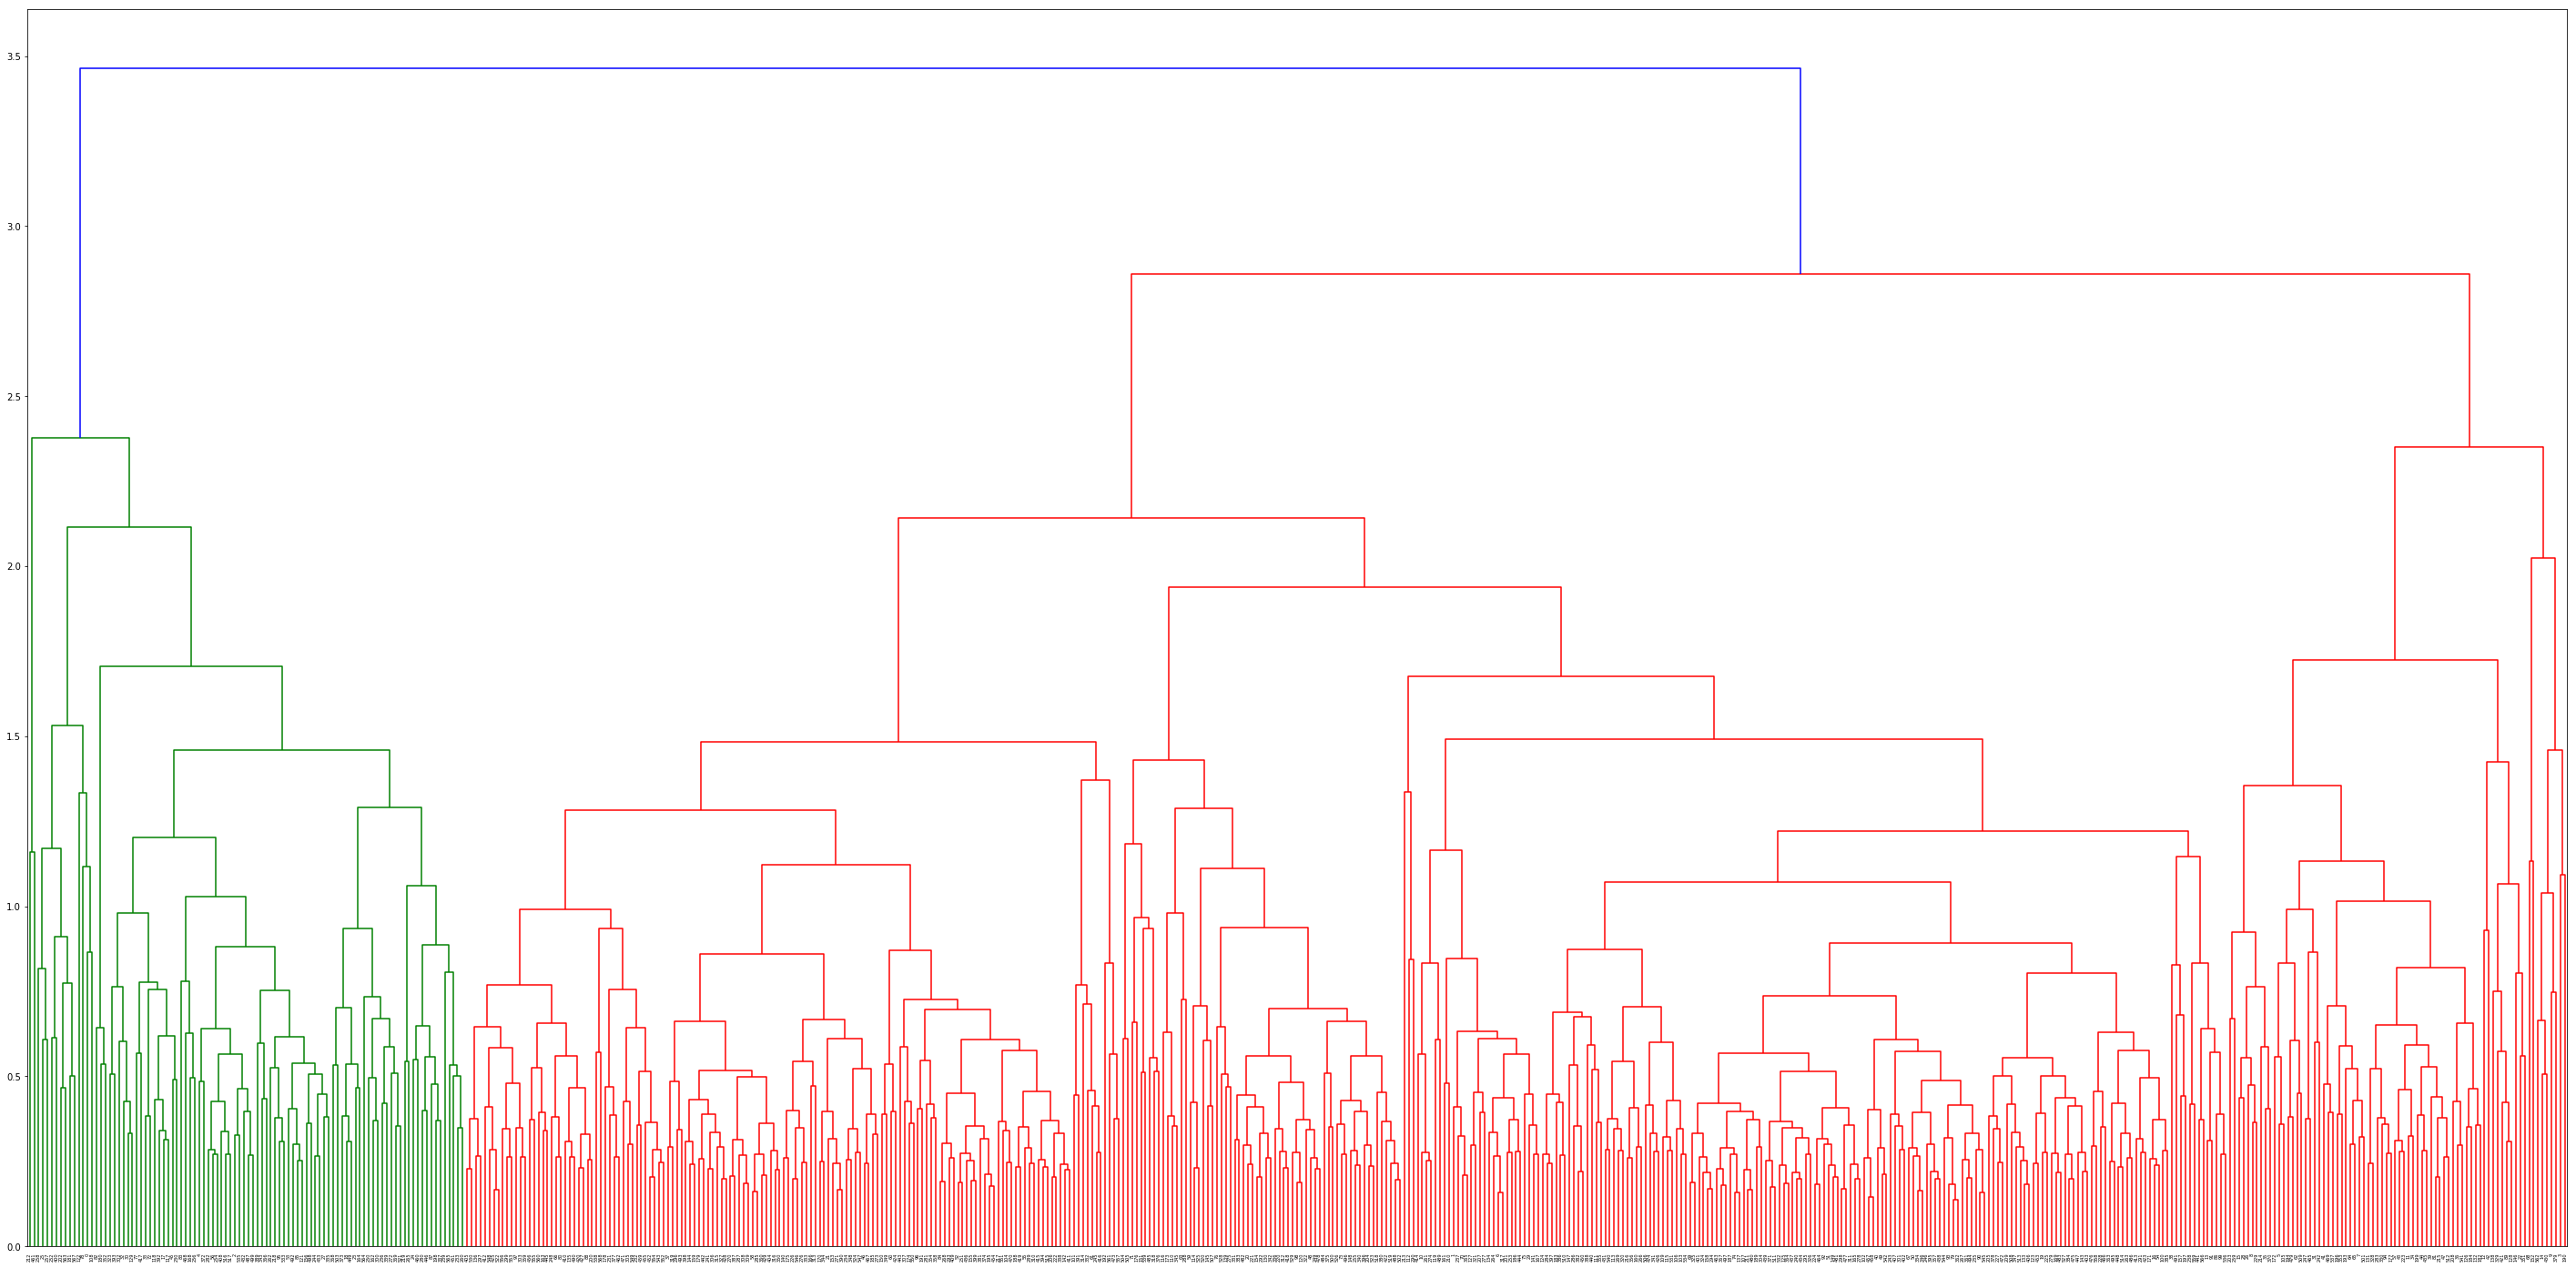

In [30]:
clusters = linkage(features, method = 'complete')
plt.figure(figsize=(50,25))
dendrogram(clusters, leaf_rotation = 90, color_threshold = 3)
plt.show()

From this chart we can guess that we need to split data into two clusters.

<a id='sskm'></a>
# Step-by-step K-means

This is a custom k-means function which has the following parameters:

 + d: features from dataset
 + k: number of clusters

We have went with the iterative approach, meaning that we placed centoroids in random places in the dataframe and then using euclidean distance we form clusters and update centroids locations. The centroids keep on updating their location until they reach the center of the clusters and become stable. When this happens our function stops execution.

In [31]:
def kmeans(d, k):
    
    def labelClusterInKMeans(point):
        distances = np.array([np.linalg.norm(centroid - point) for centroid in centroids])
        return np.argmin(distances)

    def updateCentroids():
        return [d.iloc[labels[labels == i].index.tolist()].mean() for i in labels.unique()] 
    
    #     random centroids
    centroids = ['x'] #'x' is needed just for first initial comparison in a loop below
    
    centroidsNew = []
    for i in range(k):
        centroidsNew.append(np.random.uniform(features.min(), features.max()))
    
    while not all([np.array_equal(c1, c2) for c1, c2 in zip(centroidsNew, centroids)]):
        centroids = centroidsNew
    #     label clusters
        labels = pd.Series([labelClusterInKMeans(row) for _, row in d.iterrows()])
    
    #     update centroids
        centroidsNew = updateCentroids()
    
    return labels

The custom function is called here with `features` being passsed in place of `d` as a parameter and the number of clusters `k` as `2`.

In [32]:
kmeans(features, 2)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

<a id='km'></a>
# sklearn.cluster: KMeans

We are implementing KMeans using `sklearn.cluster` library. We are calling the built in function and passing in `features` and the number of clusters `k` as `2`.

In [33]:
model = KMeans(n_clusters=2)
model.fit(features)
clusters = pd.Series(model.labels_)
clusters

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

<a id='knn_fun'></a>
# kNN Function

We have implemented a custom KNN function, the parameters that we take in this function are:

 + `dataframe`: features of dataframe 
 + `labels`: classification column
 + `point`: random data point
 + `k`: number of neighbours

In [34]:
def predictKNN(dataframe, labels, point, k):
    neighborsIndixes = np.argpartition(
        [np.linalg.norm(dataframePoint - point) for 
         _, dataframePoint in dataframe.iterrows()], k)[:k]
    neighbors = labels[neighborsIndixes].value_counts()
    
    # below is solution for case when there are equal probabilities for several labels     
    return neighbors[neighbors == np.max(neighbors)].index.values \
                [np.random.randint(0, len(neighbors[neighbors == np.max(neighbors)]))]

<a id='knn_predict'></a>
## Prediction using kNN

We are using our predict function and running it 5 times with different parameters.  
For each prediction uniformly distributed random point was used.  
`'M'` stays for *Malignant*, `'B'` stays for *Benign*.

### Prediction: 1

In [35]:
randomPoint = np.random.uniform(features.min(), features.max())
predictKNN(features, d['diagnosis'], randomPoint, 4)

'M'

### Prediction: 2

In [36]:
randomPoint = np.random.uniform(features.min(), features.max())
predictKNN(features, d['diagnosis'], randomPoint, 14)

'M'

### Prediction: 3

In [37]:
randomPoint = np.random.uniform(features.min(), features.max())
predictKNN(features, d['diagnosis'], randomPoint, 2)

'M'

### Prediction: 4

In [38]:
randomPoint = np.random.uniform(features.min(), features.max())
predictKNN(features, d['diagnosis'], randomPoint, 20)

'M'

### Prediction: 5

In [39]:
randomPoint = np.random.uniform(features.min(), features.max())
predictKNN(features, d['diagnosis'], randomPoint, 40)

'M'

<a id='knn'></a>
# sklearn.cluster: kNN

We have implemented KNN using `sklearn.cluster` library and have used grid search to find the optimal number of neighbours to form clusters.

In [40]:
randomPoint = np.random.uniform(features.min(), features.max())

grid = {'n_neighbors' : np.arange(1, 25)}

X_train, X_test, y_train, y_test = train_test_split(features, d['diagnosis'], test_size = 0.3, random_state = 42, stratify = d['diagnosis'])

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 

knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train, y_train)

#Extracting the optimal number of neighbors 

print(knn.best_params_)

knn.predict(randomPoint.reshape(1, -1))

{'n_neighbors': 7}


C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



array(['M'], dtype=object)

We have found that the optimal number of nearest neighbors is 7 and tried predicting another random point.

<a id='report'></a>
# Project Report


# <center> Diagnosing Breast Cancer </center>

To: **Breast Cancer Clinic**  
From: Ihor Markevych and Asad Mahmood  
  
## <div align="right"> Project Objective </div>
  
Based on available data, create clustering engine that will allow to **predict whether breast cancer is malignant or benign** based on digitized image of a fine needle aspirate (FNA).  
  
## <div align="right"> Technical Objective </div>
  
Following [dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) contains features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and diagnosis. Features describe characteristics of the cell nuclei present in the image and can be used as a data for clustering.  
  
Research will be focused on investigating data for quantity of potential clusters (it may be more than two, even despite only two types of diagnosis are present in a dataset, since there can be subtypes of diagnosis). After this, natural continuation of research will be to find clusters.  
  
Firstly, unsupervised learning clusterisation will be used to find clusters based on features. Next, clusters will be checked on which diagnosis they have. Those clusters can be used to investigate whether data can be effectivly clustered with unsupervised learning.  
  
Next, supervised learning algorythm will be used to create clustering that can predict whether patient has benign or malignant breast cancer.  
  
For all types of clustering custom functions will be created.  
  
  
## <div align="right"> Impact </div>
  
Clustering patients into benign or malignant groups will allow preprocessing of FNA of a breast mass before setting diagnosis.  
  
This can help doctors to make correct diagnosis and react sooner for patients with potentially malignant illness, which may save lives.  

## <div align="right"> Data </div>
  
Next visualisation depicts main feature of our data - even despite there are some outliers, generaly data is accuratly clustered into two groups, which naturally correspond to two types of diagnosis - malignant and bening.   

![](./clustersFinal.gif)

### <div align="right"> Features </div> 

Data contains 30 features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Same features should be used for future engine usage.

### <div align="right"> Number of clusters </div> 

After performing such checks as elbow method and tSNE-based visual check, desicion was taken to proceed with two clusters. As it appeared, data is naturally clustered into benign and malignant cases, which improves accuracy of model.


## <div align="right"> Prediction confidence </div>
  
As it is visualized on chart below, in most cases prediction is accurate and with high confidence. However, there can be some outliers, which means that this system should not be used as only authoritive source of decision.  

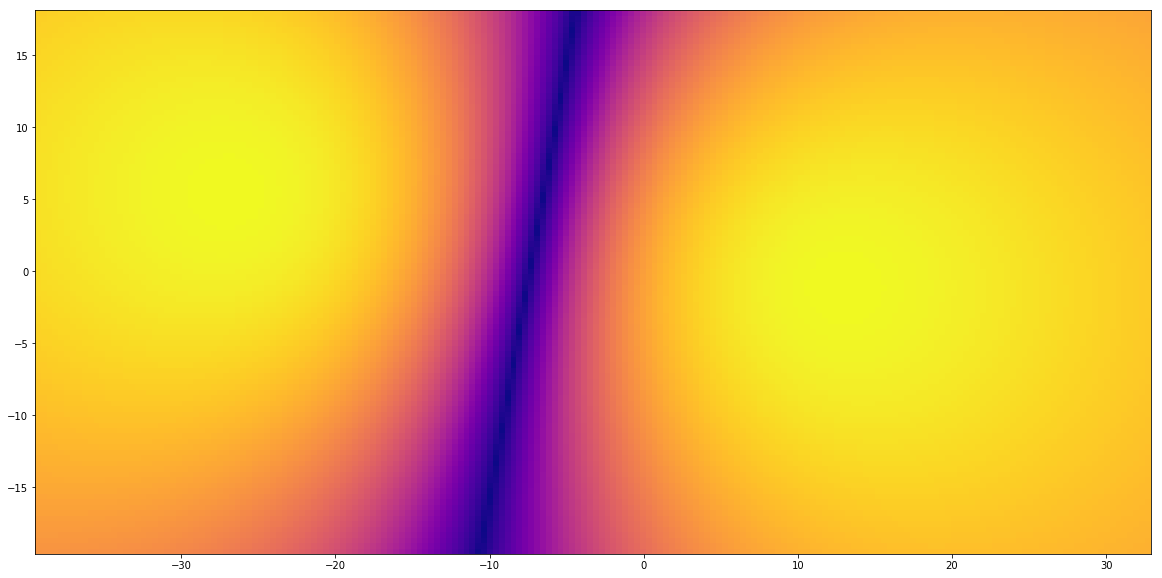
  

## <div align="right"> Summary </div>
  
* Two clusters were distinguished. They naturally correspond to two types of diagnosis.
* Based on features that are computed from a digitized image of a FNA of a breast mass, diagnosis can be predicted.
* Prediction has high confidence interval for most cases.
* Created system can be used for quick responding to potentially malignant cases:
    * If system predicts malignant case, patient should be investigated by doctor ASAP,
    * Nevertheless, if if system predicts benign case, patient should NOT be deprioritized.
